# apple_health simple usage
Author: Keita Mizukoshi

In [1]:
import pandas as pd
import datetime as dt
from apple_health import manager

import matplotlib.pyplot as plt

In [2]:
man = manager()

In [3]:
man.help()

Usage: 
man.add_path('/path/to/your/zipfile')
man.add_zip_name('export.zip'), for example
Instead of `them`, `man.set_latest_zip()` will find the latest zip file in the path list

If you want dates as datetime types
man.as_datetime = True
Then,
df = man.get_df()


### Basic way: Specify your zip file

In [4]:
man.add_path('/path/to/your/file')

['/path/to/your/file',
 '/Users/mzks/health/apple_health/notebook',
 '/Users/mzks',
 '/Users/mzks/Downloads']

In [5]:
man.add_zip_name('export 55.zip')

['export 55.zip', 'export*.zip']

The manager holds lists of possible paths and zip file names.
Earlier elements of the list have higher priority to use.
For zip file name, you can use wildcard.

### Alternative way: Choose the letest data
After making possible path and name list as shown above, you can use `man.set_latest_zip()` to set the latest data.
The function find all possible data and choose the latest.
As a MacOS default, a number is added to the end of the file name when the same name file exists.

In [6]:
# man.set_latest_zip()

### Generate DataFrame

In [7]:
man.as_datetime = True # If you want to obtain date as a type of datetime

In [8]:
%%time
df = man.get_df()

target file: /Users/mzks/Downloads/export 55.zip
CPU times: user 1min 21s, sys: 3.93 s, total: 1min 25s
Wall time: 2min 36s


In [9]:
df.head()

,date,start_date,value,type
0,2017-10-27 11:43:00+09:00,2017-10-27 11:43:00+09:00,30.9513,bmi
1,2017-10-27 11:44:18+09:00,2017-10-27 11:44:18+09:00,30.8112,bmi
2,2017-10-27 11:44:38+09:00,2017-10-27 11:44:38+09:00,30.8112,bmi
3,2017-10-27 11:46:42+09:00,2017-10-27 11:46:42+09:00,30.8813,bmi
4,2017-10-27 12:12:09+09:00,2017-10-27 12:12:09+09:00,31.1264,bmi


In [10]:
# Available type of your data
set(df['type'])

{'active_energy',
 'basal_energy',
 'besa_body_temp',
 'bmi',
 'body_fat',
 'body_mass',
 'body_temp',
 'calcium',
 'carbohydrates',
 'dietary_energy',
 'dist_walk_run',
 'env_audio_exposure',
 'exercise_time',
 'fat_saturated',
 'fat_total',
 'fiber',
 'flights_climbed',
 'heart_rate',
 'heart_rate_sdnn',
 'height',
 'iron',
 'lean_body_mass',
 'protein',
 'reboflavin',
 'resting_heart_rate',
 'sodium',
 'stand_time',
 'step_count',
 'suger',
 'thiamin',
 'vitamin_A',
 'vitamin_C',
 'vitamin_E',
 'vo2_max',
 'walking_heart_rate_average'}

### Drawing

Text(0, 0.5, 'Body mass (kg)')

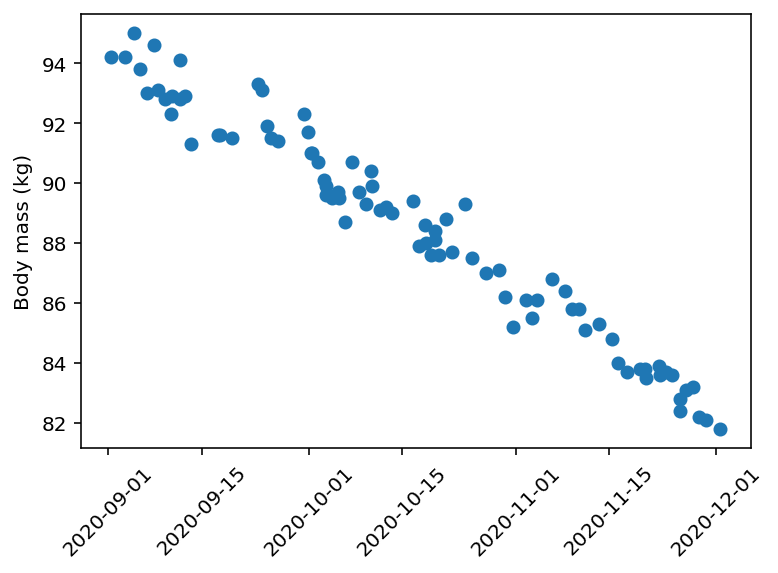

In [12]:
init_date = dt.datetime(2020,9,1,tzinfo=dt.timezone(dt.timedelta(hours=9)))
_df = df[df['type']=='body_mass']
_df = _df[_df['date'] > init_date]
plt.plot(_df['date'], _df['value'], 'o')
plt.xticks(rotation=45)
plt.ylabel('Body mass (kg)')